In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cambiar directorio
os.chdir("..")

In [ ]:
# Cargar los datos que tenemos disponibles
data = pd.read_csv("/content/churn.csv")


In [ ]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
(
    data
    .isnull()
    .any()
)

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [ ]:
# Nos deshacemos de las columnas que no contribuyen en mucho
data = data.drop(data.columns[0:3], axis=1)

data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
counts = data['Exited'].value_counts()
print(counts)

Exited
0    7963
1    2037
Name: count, dtype: int64


In [ ]:
# Convertimos los datos en formato categorico, para más info: shorturl.at/y0269
column_equivalence = {}
features = list(data.columns)
for i, column in enumerate(list([str(d) for d in data.dtypes])):
    if column == "object":
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].mode())
        categorical_column = data[data.columns[i]].astype("category")
        current_column_equivalence = dict(enumerate(categorical_column.cat.categories))
        column_equivalence[i] = dict((v,k) for k,v in current_column_equivalence.items())
        data[data.columns[i]] = categorical_column.cat.codes
    else:
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].median())

In [ ]:
column_equivalence

{1: {'France': 0, 'Germany': 1, 'Spain': 2}, 2: {'Female': 0, 'Male': 1}}

In [ ]:
# Vamos a crear un modelo de regresion logistica
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [ ]:
# Generar los datos para poder separar la variable de respuesta de los datos que tenemos disponibles
X = data.copy()
y = X.pop(data.columns[-1])

In [ ]:
# Separar los datos en datos de entrenamiento y testing
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

BEST MODEL

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from scipy.stats import uniform

# Supongamos que 'data' es tu DataFrame original

# Separar las características (X) y la variable objetivo (y)
X = data.drop('Exited', axis=1)
y = data['Exited']

# Verificar la distribución actual antes de aplicar SMOTE
print("Distribución de clases antes de aplicar SMOTE:")
print(y.value_counts())
# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verificar la nueva distribución de clases
print("Distribución de clases después de aplicar SMOTE:")
print(y_resampled.value_counts())

# Dividir los datos balanceados en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

# Definir el pipeline con escalamiento de características
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(solver='saga', random_state=42, max_iter=1000))  # Incrementar max_iter
])

# Definir los parámetros que se van a ajustar
param_dist = {
    'clf__C': uniform(loc=0.1, scale=10.0),  # Distribución uniforme para C
    'clf__penalty': ['l1', 'l2']             # Penalización L1 o L2
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)

# Entrenar el modelo usando RandomizedSearchCV
random_search.fit(X_train, y_train)

# Mostrar los mejores parámetros y puntaje
print("Mejores parámetros encontrados:")
print(random_search.best_params_)
print("Mejor puntaje de validación cruzada:")
print(random_search.best_score_)

# Evaluar el mejor modelo en el conjunto de prueba
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Mostrar métricas de evaluación
print("\nReporte de clasificación en conjunto de prueba:")
print(classification_report(y_test, y_pred))

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(conf_matrix)



Distribución de clases después de aplicar SMOTE:
Exited
1    7963
0    7963
Name: count, dtype: int64
Mejores parámetros encontrados:
{'clf__C': 0.6808361216819946, 'clf__penalty': 'l2'}
Mejor puntaje de validación cruzada:
0.7700923617942853

Reporte de clasificación en conjunto de prueba:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      2389
           1       0.77      0.77      0.77      2389

    accuracy                           0.77      4778
   macro avg       0.77      0.77      0.77      4778
weighted avg       0.77      0.77      0.77      4778


Matriz de Confusión:
[[1837  552]
 [ 540 1849]]


In [ ]:
# Crear el modelo y entrenarlo
clf_lin =  LogisticRegression(random_state=41, solver='saga', multi_class='multinomial', penalty='l1', C=3.85).fit(X, y)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# Medir los resultados obtenidos
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, clf_lin.predict(X_test))


array([[2657,    0],
       [ 643,    0]])

In [ ]:
# Generar el binario del modelo para reutilizarlo, equivalencia de variables categoricas y caracteristicas del modelo
import pickle
pickle.dump(clf_lin, open("/content/model.pk", "wb"))
pickle.dump(column_equivalence, open("/content/column_equivalence.pk", "wb"))
pickle.dump(features, open("/content/features.pk", "wb"))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [ ]:
model = pickle.load(open("/content/model.pk", "rb"))
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8051515151515152
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[2657    0]
 [ 643    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.8015151515151515
Precision: 0.4423076923076923
Recall: 0.07153965785381027
F1 Score: 0.12315930388219544
Confusion Matrix:
[[2599   58]
 [ 597   46]]

In [ ]:
correlation_matrix = data.corr()

print("Matriz de correlación:")
print(correlation_matrix)

Matriz de correlación:
                 Geography       Age   Balance  EstimatedSalary    Exited
Geography         1.000000  0.022812  0.069408        -0.001369  0.035943
Age               0.022812  1.000000  0.028308        -0.007201  0.285323
Balance           0.069408  0.028308  1.000000         0.012797  0.118533
EstimatedSalary  -0.001369 -0.007201  0.012797         1.000000  0.012097
Exited            0.035943  0.285323  0.118533         0.012097  1.000000


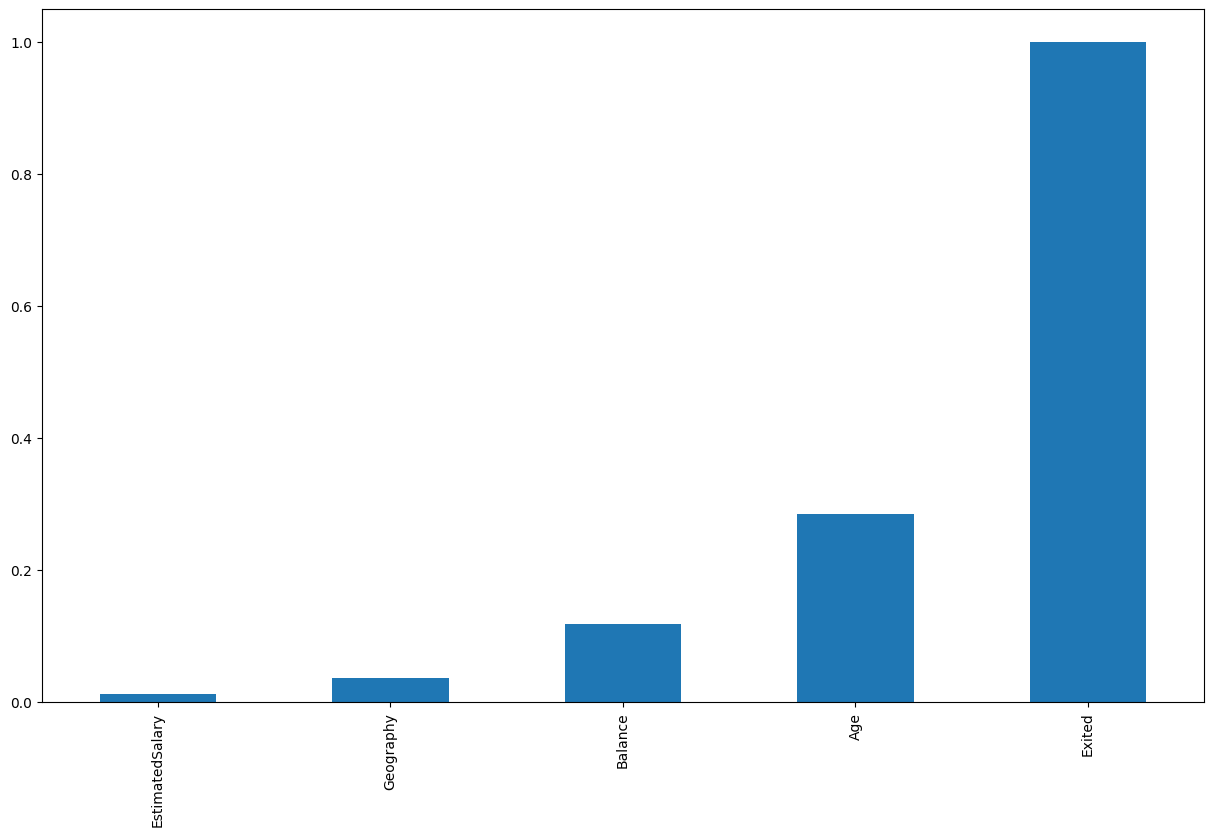

In [ ]:
fig = plt.figure(figsize=(15,9))
data.corr()['Exited'].sort_values(ascending=True).plot(kind='bar')
plt.show()

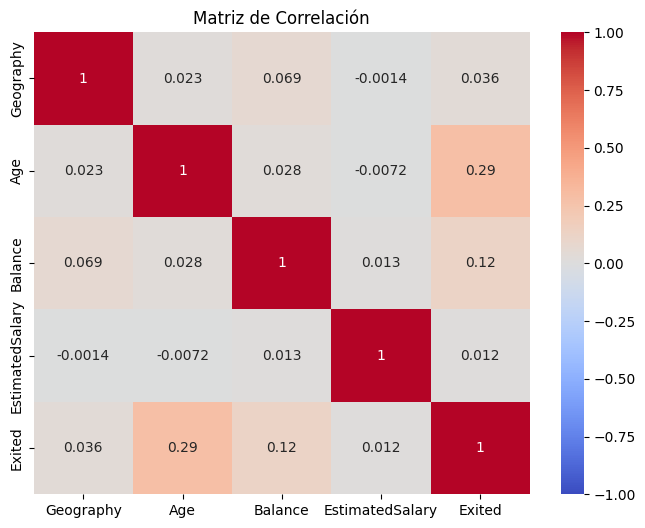

In [ ]:
correlation_matrix = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy.stats import uniform
from sklearn.metrics import confusion_matrix

# Aplicar SMOTE para rebalancear el conjunto de datos de entrenamiento
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir el pipeline con escalamiento de características
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(solver='saga', random_state=42))
])

# Definir los parámetros que se van a ajustar
param_dist = {
    'clf__C': uniform(loc=0.1, scale=10.0),  # Distribución uniforme para C
    'clf__penalty': ['l1', 'l2']             # Penalización L1 o L2
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)

# Entrenar el modelo usando RandomizedSearchCV
random_search.fit(X_train, y_train)

# Mostrar los mejores parámetros y puntaje
print("Mejores parámetros encontrados:")
print(random_search.best_params_)
print("Mejor puntaje de validación cruzada:")
print(random_search.best_score_)

# Evaluar el mejor modelo en el conjunto de prueba
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Mostrar métricas de evaluación
from sklearn.metrics import classification_report
print("\nReporte de clasificación en conjunto de prueba:")
print(classification_report(y_test, y_pred))

# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(conf_matrix)

Mejores parámetros encontrados:
{'clf__C': 3.845401188473625, 'clf__penalty': 'l1'}
Mejor puntaje de validación cruzada:
0.8032857142857143

Reporte de clasificación en conjunto de prueba:
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      2416
           1       0.60      0.17      0.27       584

    accuracy                           0.82      3000
   macro avg       0.72      0.57      0.58      3000
weighted avg       0.79      0.82      0.77      3000


Matriz de Confusión:
[[2349   67]
 [ 483  101]]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from scipy.stats import uniform

# Supongamos que 'data' es tu DataFrame original

# Separar las características (X) y la variable objetivo (y)
X = data.drop('Exited', axis=1)
y = data['Exited']

# Aplicar SMOTE para balancear las clases
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verificar la nueva distribución de clases después de aplicar SMOTE
print("\nDistribución de clases después de aplicar SMOTE:")
print(pd.Series(y_resampled).value_counts())

# Crear un DataFrame con los datos balanceados
data_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Exited')], axis=1)

# Tomar una muestra de 2000 ejemplos de cada clase
data_sampled = data_resampled.groupby('Exited').sample(n=2000, random_state=42)

# Separar las características y la variable objetivo del nuevo conjunto de datos muestreado
X_sampled = data_sampled.drop('Exited', axis=1)
y_sampled = data_sampled['Exited']

# Dividir los datos balanceados en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.3, random_state=42, stratify=y_sampled)

# Definir el pipeline con escalamiento de características
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(solver='saga', random_state=42, max_iter=1000))  # Incrementar max_iter
])

# Definir los parámetros que se van a ajustar
param_dist = {
    'clf__C': uniform(loc=0.1, scale=10.0),  # Distribución uniforme para C
    'clf__penalty': ['l1', 'l2']             # Penalización L1 o L2
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)

# Entrenar el modelo usando RandomizedSearchCV
random_search.fit(X_train, y_train)

# Mostrar los mejores parámetros y puntaje
print("Mejores parámetros encontrados:")
print(random_search.best_params_)
print("Mejor puntaje de validación cruzada:")
print(random_search.best_score_)

# Evaluar el mejor modelo en el conjunto de prueba
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Mostrar métricas de evaluación
print("\nReporte de clasificación en conjunto de prueba:")
print(classification_report(y_test, y_pred))

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(conf_matrix)


Distribución de clases después de aplicar SMOTE:
Exited
1    7963
0    7963
Name: count, dtype: int64
Mejores parámetros encontrados:
{'clf__C': 0.10778765841014329, 'clf__penalty': 'l2'}
Mejor puntaje de validación cruzada:
0.7710714285714286

Reporte de clasificación en conjunto de prueba:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       600
           1       0.78      0.81      0.79       600

    accuracy                           0.79      1200
   macro avg       0.79      0.79      0.79      1200
weighted avg       0.79      0.79      0.79      1200


Matriz de Confusión:
[[460 140]
 [114 486]]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Supongamos que 'data' es tu DataFrame original
# Separar las características (X) y la variable objetivo (y)
X = data.drop('Exited', axis=1)
y = data['Exited']

# Verificar la distribución actual antes de aplicar SMOTE
print("Distribución de clases antes de aplicar SMOTE:")
print(y.value_counts())

# Aplicar SMOTE para balancear las clases
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verificar la nueva distribución de clases después de aplicar SMOTE
print("\nDistribución de clases después de aplicar SMOTE:")
print(pd.Series(y_resampled).value_counts())

# Dividir los datos balanceados en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

# Definir el pipeline con escalamiento de características y modelo de regresión logística
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(solver='saga', random_state=42, max_iter=1000))
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Mostrar métricas de evaluación
print("\nReporte de clasificación en conjunto de prueba:")
print(classification_report(y_test, y_pred))

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(conf_matrix)



Distribución de clases antes de aplicar SMOTE:
Exited
0    7963
1    2037
Name: count, dtype: int64

Distribución de clases después de aplicar SMOTE:
Exited
1    7963
0    7963
Name: count, dtype: int64

Reporte de clasificación en conjunto de prueba:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      2389
           1       0.77      0.77      0.77      2389

    accuracy                           0.77      4778
   macro avg       0.77      0.77      0.77      4778
weighted avg       0.77      0.77      0.77      4778


Matriz de Confusión:
[[1837  552]
 [ 540 1849]]


GrisSearchCV

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Supongamos que 'data' es tu DataFrame original
# Separar las características (X) y la variable objetivo (y)
X = data.drop('Exited', axis=1)
y = data['Exited']

# Verificar la distribución actual antes de aplicar SMOTE
print("Distribución de clases antes de aplicar SMOTE:")
print(y.value_counts())

# Aplicar SMOTE para balancear las clases
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verificar la nueva distribución de clases después de aplicar SMOTE
print("\nDistribución de clases después de aplicar SMOTE:")
print(pd.Series(y_resampled).value_counts())

# Dividir los datos balanceados en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

# Definir el pipeline con escalamiento de características y modelo de regresión logística
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(solver='saga', random_state=42, max_iter=1000))
])

# Definir los parámetros para GridSearchCV
param_grid = {
    'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'clf__penalty': ['l1', 'l2']
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='f1', verbose=1)

# Entrenar el modelo usando GridSearchCV
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros y puntaje
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntaje de validación cruzada:")
print(grid_search.best_score_)

# Evaluar el mejor modelo en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Mostrar métricas de evaluación
print("\nReporte de clasificación en conjunto de prueba:")
print(classification_report(y_test, y_pred))

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(conf_matrix)


Distribución de clases antes de aplicar SMOTE:
Exited
0    7963
1    2037
Name: count, dtype: int64

Distribución de clases después de aplicar SMOTE:
Exited
1    7963
0    7963
Name: count, dtype: int64
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejores parámetros encontrados:
{'clf__C': 0.001, 'clf__penalty': 'l2'}
Mejor puntaje de validación cruzada:
0.7739744869130721

Reporte de clasificación en conjunto de prueba:
              precision    recall  f1-score   support

           0       0.77      0.76      0.77      2389
           1       0.77      0.77      0.77      2389

    accuracy                           0.77      4778
   macro avg       0.77      0.77      0.77      4778
weighted avg       0.77      0.77      0.77      4778


Matriz de Confusión:
[[1825  564]
 [ 542 1847]]
